In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
#倒入一些必要的库

In [68]:
feanum=1#一共有多少特征
window=5#时间窗设置
df1=pd.read_csv('trend.csv') #读取数据
df1=df1.iloc[:,2:]#删除前两列没用的
df1.tail()

,liehua
1528,-1.846154
1529,-1.797411
1530,-1.641026
1531,-1.656805
1532,-0.992556


In [69]:
from sklearn import preprocessing#进行归一化操作
min_max_scaler = preprocessing.MinMaxScaler()
df0=min_max_scaler.fit_transform(df1)
df = pd.DataFrame(df0, columns=df1.columns)
df.tail()

,liehua
1528,0.259214
1529,0.269882
1530,0.304110
1531,0.300656
1532,0.446039


In [70]:
#这一部分在处理数据 将原始数据改造为LSTM网络的输入
stock=df
seq_len=window
amount_of_features = len(stock.columns)#有几列
data = stock.as_matrix() #pd.DataFrame(stock) 表格转化为矩阵
sequence_length = seq_len + 1#序列长度+1
result = []
for index in range(len(data) - sequence_length):#循环 数据长度-时间窗长度 次
    result.append(data[index: index + sequence_length])#第i行到i+5
result = np.array(result)#得到样本，样本形式为 window*feanum
cut=150#分训练集测试集 最后cut个样本为测试集
train = result[:-cut, :]
x_train = train[:, :-1]
y_train = train[:, -1][:,-1]
x_test = result[-cut:, :-1]
y_test = result[-cut:, -1][:,-1]
X_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
X_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))  

E:\anoconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [71]:
#展示下训练集测试集的形状 看有没有问题
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (1377, 5, 1)
y_train (1377,)
X_test (150, 5, 1)
y_test (150,)


In [86]:
#建立、训练模型过程
d = 0.01
model = Sequential()#建立层次模型
model.add(LSTM(32, input_shape=(window, feanum), return_sequences=True))#建立LSTM层
model.add(Dropout(d))#建立的遗忘层
model.add(LSTM(16, input_shape=(window, feanum), return_sequences=False))#建立LSTM层
model.add(Dropout(d))#建立的遗忘层
model.add(Dense(2,init='uniform',activation='relu'))   #建立全连接层     
model.add(Dense(1,init='uniform',activation='relu'))
model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
model.fit(X_train, y_train, nb_epoch =100, batch_size = 128) #训练模型nb_epoch次

E:\anoconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(2, kernel_initializer="uniform", activation="relu")`
  
E:\anoconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform", activation="relu")`
  if __name__ == '__main__':
E:\anoconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:11: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/100
1377/1377 [==============================] - 3s 2ms/step - loss: 0.5143 - acc: 7.2622e-04
Epoch 2/100
1377/1377 [==============================] - 0s 64us/step - loss: 0.4975 - acc: 7.2622e-04
Epoch 3/100
1377/1377 [==============================] - 0s 64us/step - loss: 0.4778 - acc: 7.2622e-04
Epoch 4/100
1377/1377 [==============================] - 0s 65us/step - loss: 0.4503 - acc: 7.2622e-04
Epoch 5/100
1377/1377 [==============================] - 0s 63us/step - loss: 0.4044 - acc: 7.2622e-04
Epoch 6/100
1377/1377 [==============================] - 0s 64us/step - loss: 0.3298 - acc: 7.2622e-04
Epoch 7/100
1377/1377 [==============================] - 0s 63us/step - loss: 0.2315 - acc: 7.2622e-04
Epoch 8/100
1377/1377 [==============================] - 0s 62us/step - loss: 0.1447 - acc: 7.2622e-04
Epoch 9/100
1377/1377 [==============================] - 0s 65us/step - loss: 0.0872 - acc: 7.2622e-04
Epoch 10/100
1377/1377 [==============================] - 0s 64us/step - l

In [87]:
#总结模型
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 5, 32)             4352      
_________________________________________________________________
dropout_15 (Dropout)         (None, 5, 32)             0         
_________________________________________________________________
lstm_16 (LSTM)               (None, 16)                3136      
_________________________________________________________________
dropout_16 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 34        
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 3         
Total params: 7,525
Trainable params: 7,525
Non-trainable params: 0
_________________________________________________________________


In [88]:
#在训练集上的拟合结果
y_train_predict=model.predict(X_train)[:,0]
y_train=y_train

Text(0.5,1,'Train Data')

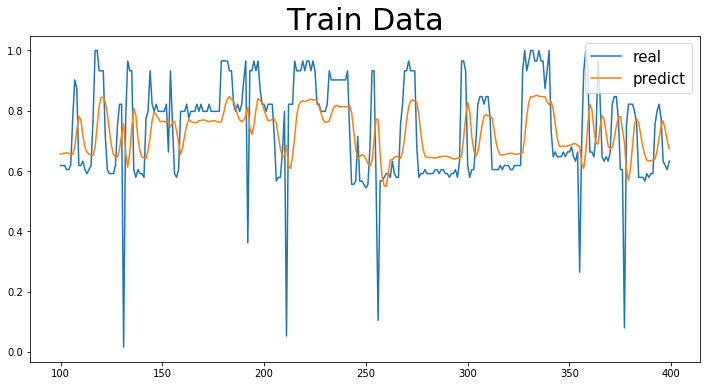

In [89]:
draw=pd.concat([pd.DataFrame(y_train),pd.DataFrame(y_train_predict)],axis=1)
draw.iloc[100:400,0].plot(figsize=(12,6))
draw.iloc[100:400,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),loc='upper right',fontsize='15')
plt.title("Train Data",fontsize='30') #添加标题
#展示在训练集上的表现 

In [90]:
#在测试集上的预测
y_test_predict=model.predict(X_test)[:,0]
y_test=y_test

Text(0.5,1,'Test Data')

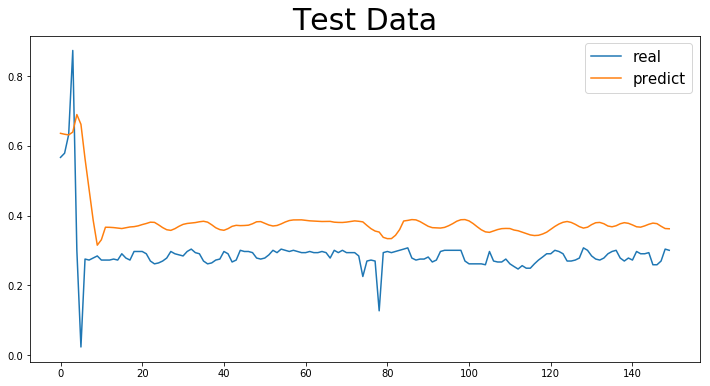

In [91]:
draw=pd.concat([pd.DataFrame(y_test),pd.DataFrame(y_test_predict)],axis=1);
draw.iloc[:,0].plot(figsize=(12,6))
draw.iloc[:,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),loc='upper right',fontsize='15')
plt.title("Test Data",fontsize='30') #添加标题
#展示在测试集上的表现 

In [92]:
#输出结果
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100
print('训练集上的MAE/MSE/MAPE')
print(mean_absolute_error(y_train_predict, y_train))
print(mean_squared_error(y_train_predict, y_train) )
print(mape(y_train_predict, y_train) )
print('测试集上的MAE/MSE/MAPE')
print(mean_absolute_error(y_test_predict, y_test))
print(mean_squared_error(y_test_predict, y_test) )
print(mape(y_test_predict, y_test) )

训练集上的MAE/MSE/MAPE
0.08674945427056861
0.014203764579482598
12.407452566225615
测试集上的MAE/MSE/MAPE
0.0963064041389398
0.01284973826913568
24.576565553204244
